In [1]:
"""Data points"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 1000
X, _ = make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=1.0, random_state=42)

In [2]:
n_samples = 2000
x = np.linspace(0, 4 * np.pi, n_samples)
y = np.sin(x) * 3 + np.random.normal(scale=0.1, size=x.shape)

thickness_noise = np.random.normal(scale=0.7, size=x.shape)

X3 = np.vstack((x + thickness_noise, y)).T

In [3]:
n_samples = 500
x = np.linspace(0, 4 * np.pi, n_samples)

# Generate y-values with small offsets
offsets = np.linspace(0.1, 1.0, 10)  # 10 different offsets for 10 sine waves

# Generate the sine waves and add noise to x-values
sine_waves = []
for offset in offsets:
    y = np.sin(x) * 3 + offset
    thickness_noise = np.random.normal(scale=0.7, size=x.shape)
    sine_wave = np.vstack((x + thickness_noise, y)).T
    sine_waves.append(sine_wave)

# Combine all sine waves into one array
X4 = np.vstack(sine_waves)

In [4]:
def calculate_distances_close(x, p, close):
    n_samples = x.shape[0]
    distances = np.zeros(n_samples)
    
    for i in range(n_samples):
        dist_list = []
        for j in range(n_samples):
            if i != j:
                dist = np.linalg.norm(x[i] - x[j], ord=p)**p
                dist_list.append(dist)
        
        # Sort the distances and select the top 'close' closest points
        dist_list.sort()
        top_close_dists = dist_list[:close]
        
        # Calculate the average of these top 'close' distances
        distances[i] = sum(top_close_dists) / n_samples #close
    
    return distances

# Example usage:
distances = calculate_distances_close(X, 2, 1000)
distances3 = calculate_distances_close(X3, 2, 1000)
distances4 = calculate_distances_close(X4, 2, 1000)




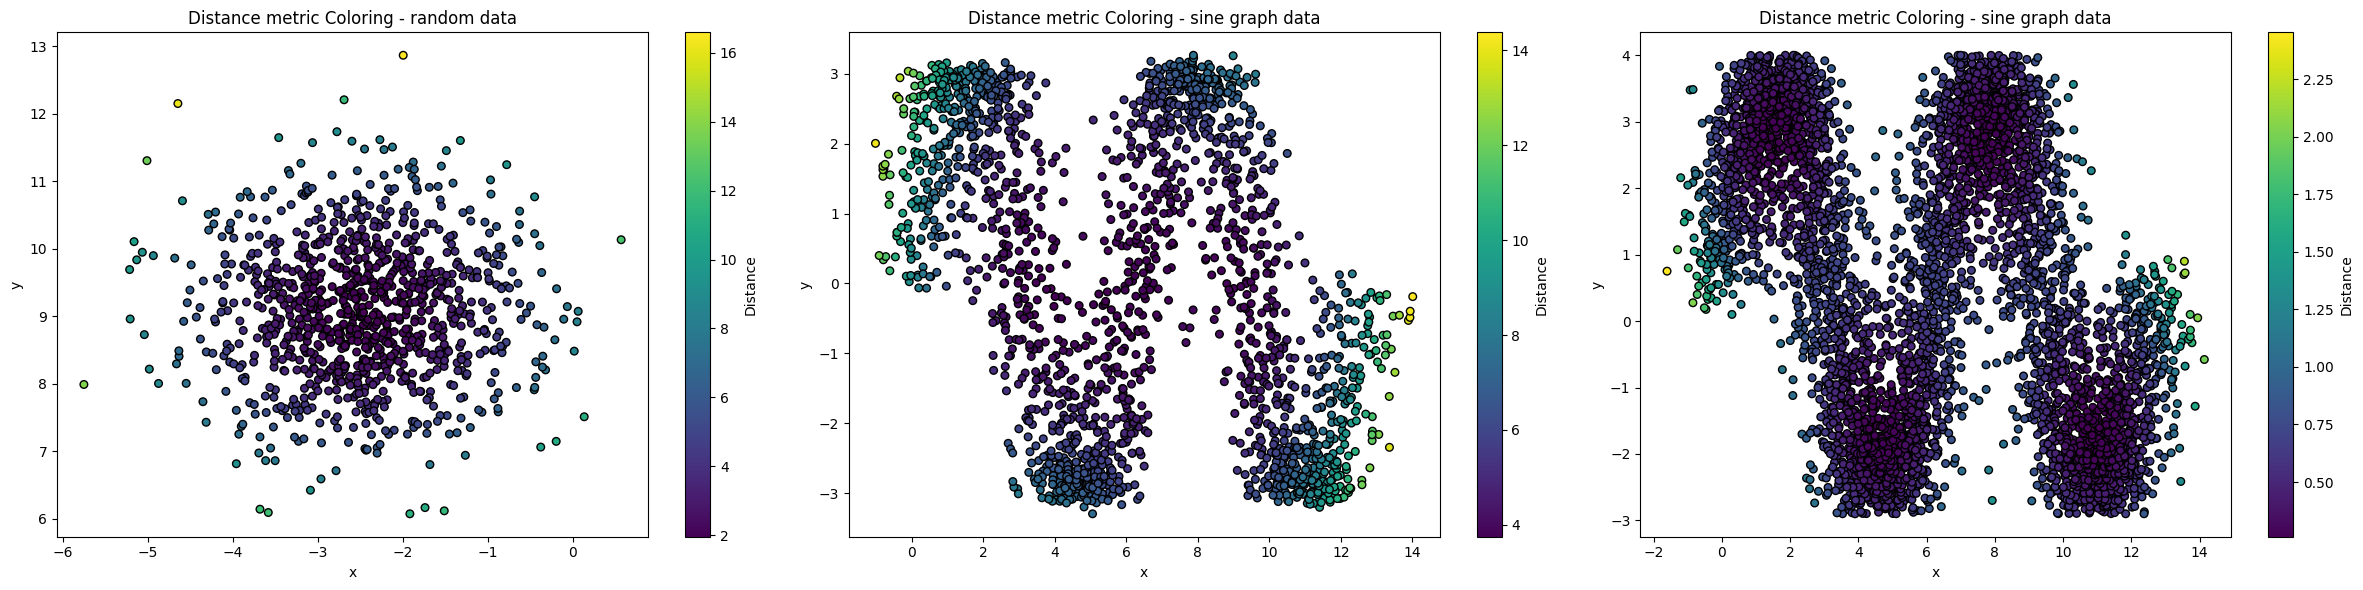

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plot 1
scatter = axs[0].scatter(X[:, 0], X[:, 1], c=distances, cmap='viridis', s=30, edgecolor='k')
axs[0].set_title('Distance metric Coloring - random data')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.colorbar(scatter, ax=axs[0], label='Distance')


# Plot 2 
scatter = axs[1].scatter(X3[:, 0], X3[:, 1], c=distances3, cmap='viridis', s=30, edgecolor='k')
axs[1].set_title('Distance metric Coloring - sine graph data')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
fig.colorbar(scatter, ax=axs[1], label='Distance')

# Plot 3
scatter = axs[2].scatter(X4[:, 0], X4[:, 1], c=distances4, cmap='viridis', s=30, edgecolor='k')
axs[2].set_title('Distance metric Coloring - sine graph data')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
fig.colorbar(scatter, ax=axs[2], label='Distance')

plt.tight_layout()
plt.show()

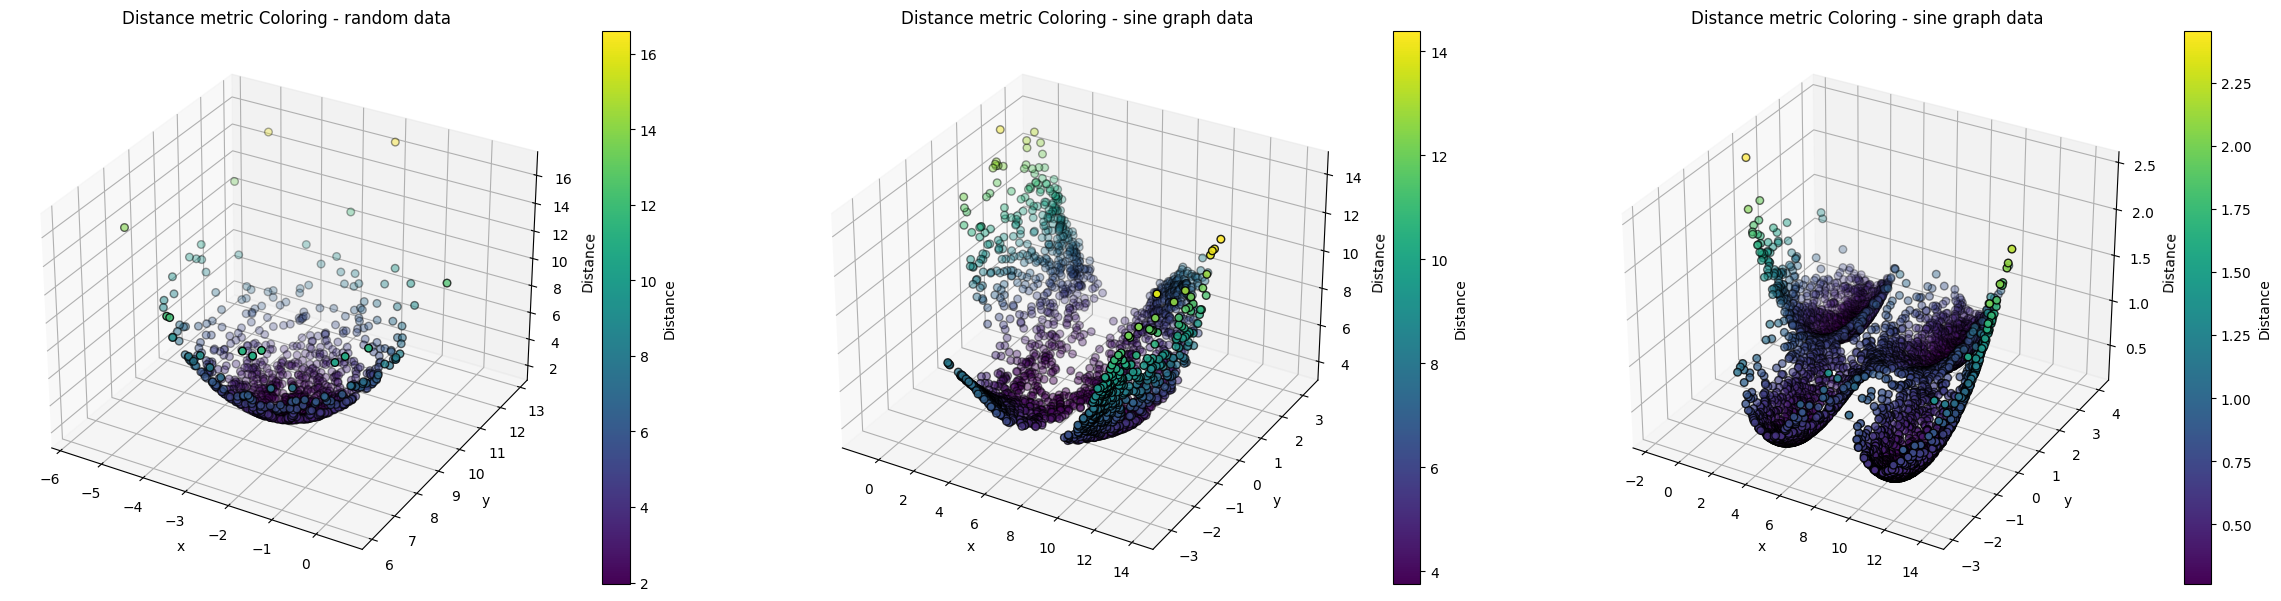

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(24, 6))

# Plot 1
ax1 = fig.add_subplot(131, projection='3d')
scatter = ax1.scatter(X[:, 0], X[:, 1], distances, c=distances, cmap='viridis', s=30, edgecolor='k')
ax1.set_title('Distance metric Coloring - random data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('Distance')
fig.colorbar(scatter, ax=ax1, label='Distance')

# Plot 2 
ax2 = fig.add_subplot(132, projection='3d')
scatter = ax2.scatter(X3[:, 0], X3[:, 1], distances3, c=distances3, cmap='viridis', s=30, edgecolor='k')
ax2.set_title('Distance metric Coloring - sine graph data')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('Distance')
fig.colorbar(scatter, ax=ax2, label='Distance')

# Plot 3
ax3 = fig.add_subplot(133, projection='3d')
scatter = ax3.scatter(X4[:, 0], X4[:, 1], distances4, c=distances4, cmap='viridis', s=30, edgecolor='k')
ax3.set_title('Distance metric Coloring - sine graph data')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('Distance')
fig.colorbar(scatter, ax=ax3, label='Distance')

plt.tight_layout()
plt.show()


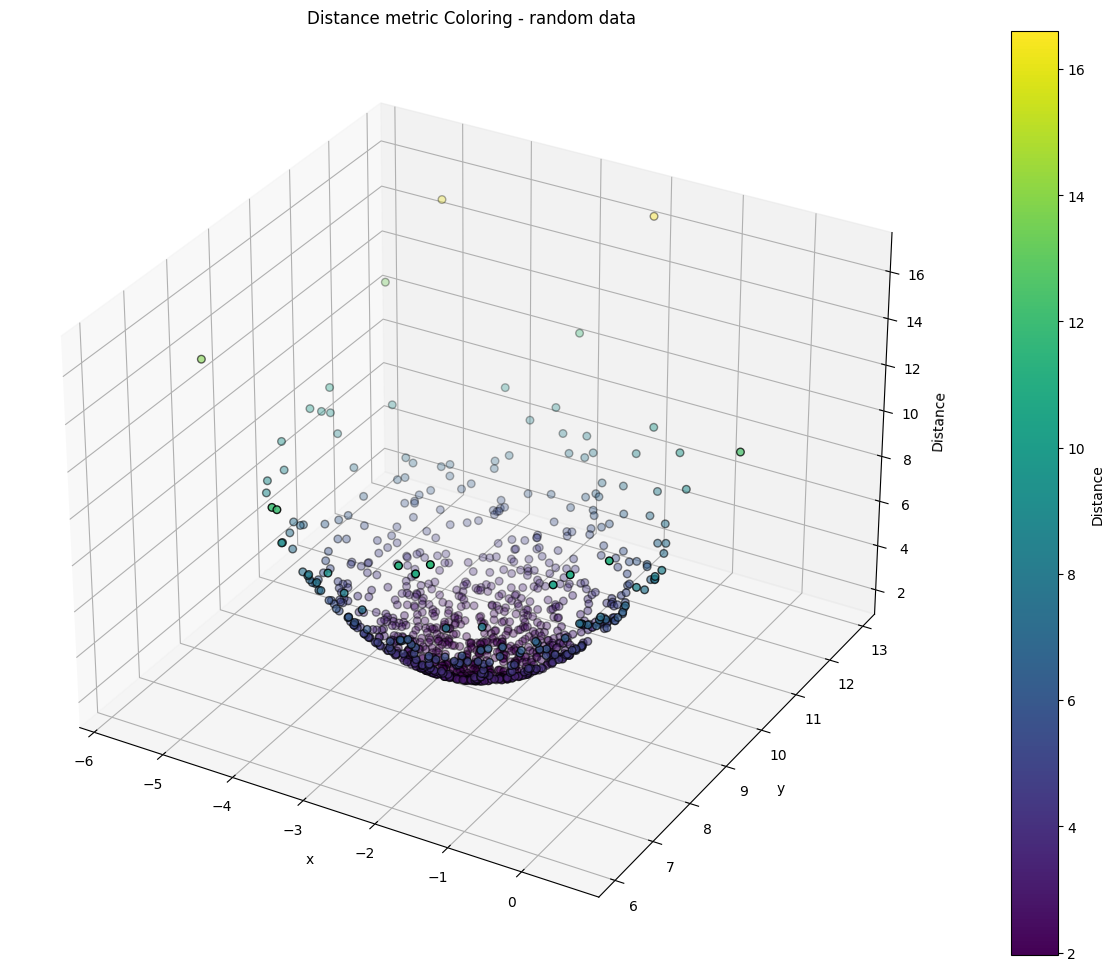

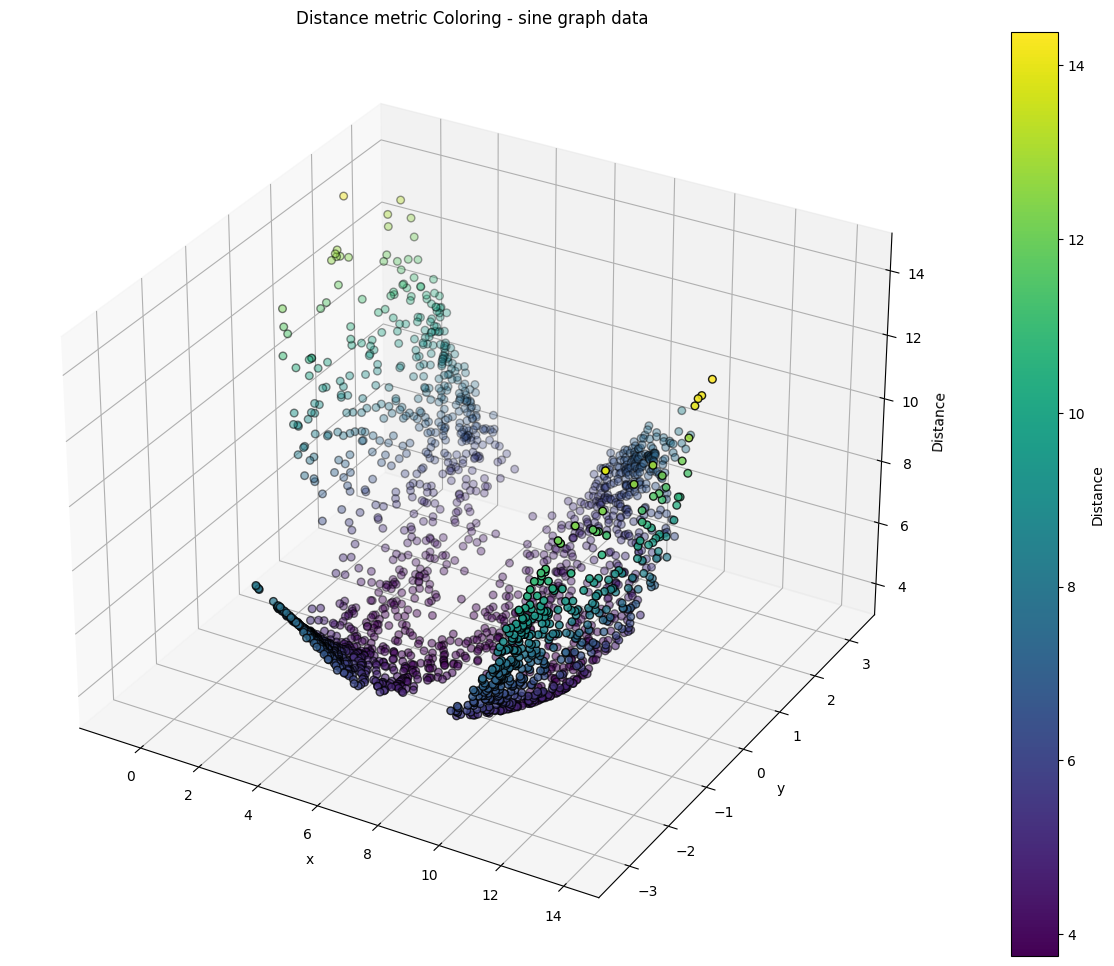

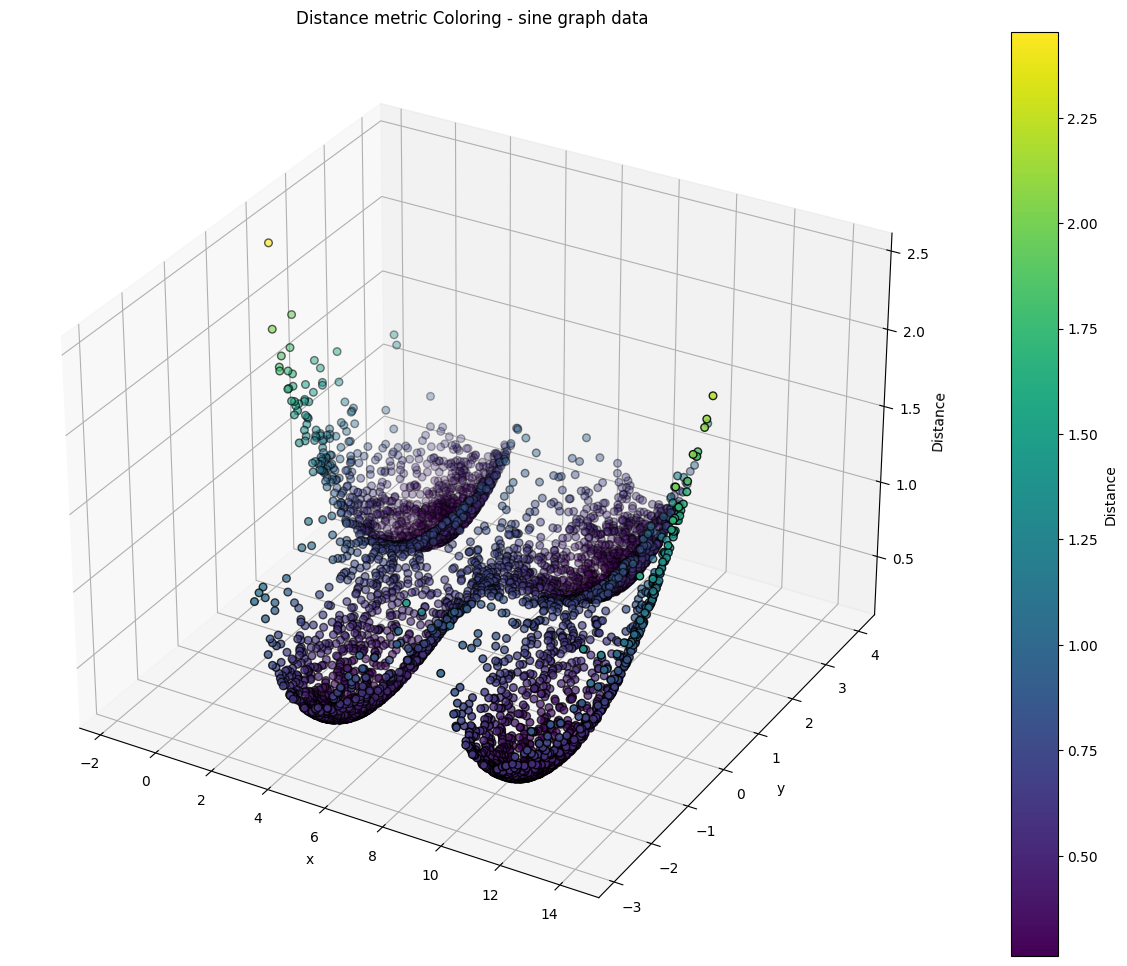

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot 1: Random Data
fig1 = plt.figure(figsize=(20, 12))  # Adjusted size for a bigger, stretched figure
ax1 = fig1.add_subplot(111, projection='3d')
scatter = ax1.scatter(X[:, 0], X[:, 1], distances, c=distances, cmap='viridis', s=30, edgecolor='k')
ax1.set_title('Distance metric Coloring - random data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('Distance')
fig1.colorbar(scatter, ax=ax1, label='Distance')
plt.show()

# Plot 2: Sine Graph Data 1
fig2 = plt.figure(figsize=(20, 12))  # Adjusted size for a bigger, stretched figure
ax2 = fig2.add_subplot(111, projection='3d')
scatter = ax2.scatter(X3[:, 0], X3[:, 1], distances3, c=distances3, cmap='viridis', s=30, edgecolor='k')
ax2.set_title('Distance metric Coloring - sine graph data')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('Distance')
fig2.colorbar(scatter, ax=ax2, label='Distance')
plt.show()

# Plot 3: Sine Graph Data 2
fig3 = plt.figure(figsize=(20, 12))  # Adjusted size for a bigger, stretched figure
ax3 = fig3.add_subplot(111, projection='3d')
scatter = ax3.scatter(X4[:, 0], X4[:, 1], distances4, c=distances4, cmap='viridis', s=30, edgecolor='k')
ax3.set_title('Distance metric Coloring - sine graph data')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('Distance')
fig3.colorbar(scatter, ax=ax3, label='Distance')
plt.show()
